In [1]:
from mcts_borrowed import MCTS
from utt2 import UTTNode
from tqdm import tqdm
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
import numpy as np

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
def random_choose(board):
    return board.find_random_child()

def benchmark(n_games, player):
    results = {"Model": 0, "Baseline": 0, "Tie": 0}
    #double_c = {1 : 0, -1:0}
    for i in tqdm(range(n_games)):
        board = UTTNode(current_player=1)
        for i in range(300):
            #player.do_rollout(board)
            #player.do_rollout(board)
            player.do_rollout(board)
            board = player.choose(board)
            if board.is_terminal():
                #print("a")
                break
            #random_move
            board = board.find_random_child()
            if board.is_terminal():
                #print("b")
                #print(board)
                
                break
        #double_c[board.current_player] =  double_c[board.current_player] +1
        result = board.reward()
        #print(board.current_player)
        if result ==1:
            results["Model"] +=1
        elif result == 0:
            results["Baseline"] += 1
        else:
            results["Tie"]+=1
    #print(double_c)
    return results

In [4]:
def play_game(x, o = None):
    board = UTTNode(current_player=1)
    #while not board.is_terminal():
    
    for i in range(300):
        # You can train as you go, or only at the beginning.
        # Here, we train as we go, doing fifty rollouts each turn.
        x.do_rollout(board)
        board = x.choose(board)
        
        if board.is_terminal():
            #print(board)
            break
        if o is None:
            board = random_choose(board)
        else:
            o.do_rollout(board)
            board = o.choose(board)
        if board.is_terminal():
            #print(board)
            break
    return board.reward()

In [5]:
import numpy as np
def plotting(data, title):
    for key, value in data.items():
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plt.plot(np.arange(len(value)), value, label = key)
    plt.ylabel("Wins-Losses divided by number of games")
    plt.xlabel("Computational budget")
    plt.legend()
    plt.title(title)

In [6]:
board = UTTNode(current_player=1)
X = MCTS(5, 1)

In [7]:

"".join([str(item) for sublist in board.bot_boards.values() for item in sublist])

'222222222222222222222222222222222222222222222222222222222222222222222222222222222'

In [8]:
print(board)
X.do_rollout(board)
board = X.choose(board)
board = random_choose(board)
print(board)

_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _

_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _

_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _


_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _

_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ _

_ _ _  _ _ _  _ _ o
_ _ _  _ _ _  _ _ _
_ _ _  _ _ _  _ _ x




In [11]:
n_sims = 10
n_benchmark = 100

data3 = {"uct": [],"vanilla": []}
for i in range(10,n_sims+1,1):
    X = MCTS(i, 1)
    O = MCTS(i, 1, "norm")
    bench_x = benchmark(n_benchmark, X)
    bench_o = benchmark(n_benchmark, O)
    #print(bench_x)
    data3["uct"].append((bench_x["Model"]-bench_x["Baseline"])/n_benchmark)
    data3["vanilla"].append((bench_o["Model"]-bench_o["Baseline"])/n_benchmark)
    #result = play_game(X)
    #result = play_game(O)

  4%|▍         | 4/100 [01:23<37:44, 23.59s/it]

In [ ]:
data3

{'uct': [-0.16, -0.05, -0.19, 0.09, -0.07, -0.05, 0.02, -0.09, -0.03, -0.03],
 'vanilla': [-0.02, -0.13, -0.02, 0.04, 0.02, 0.06, -0.11, -0.15, 0.02, -0.17]}

In [ ]:
import json
with open('post_opt_data.json', 'w') as fp:
    json.dump(data3, fp)

In [ ]:
import json
with open('new_data.json', 'r') as f:
    dat = json.load(f)
with open('new_new_data.json', 'r') as f:
    dat2 = json.load(f)

In [ ]:
final = {"uct": dat["uct"]+dat2["uct"], "vanilla" : dat["vanilla"] + dat2["vanilla"]}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


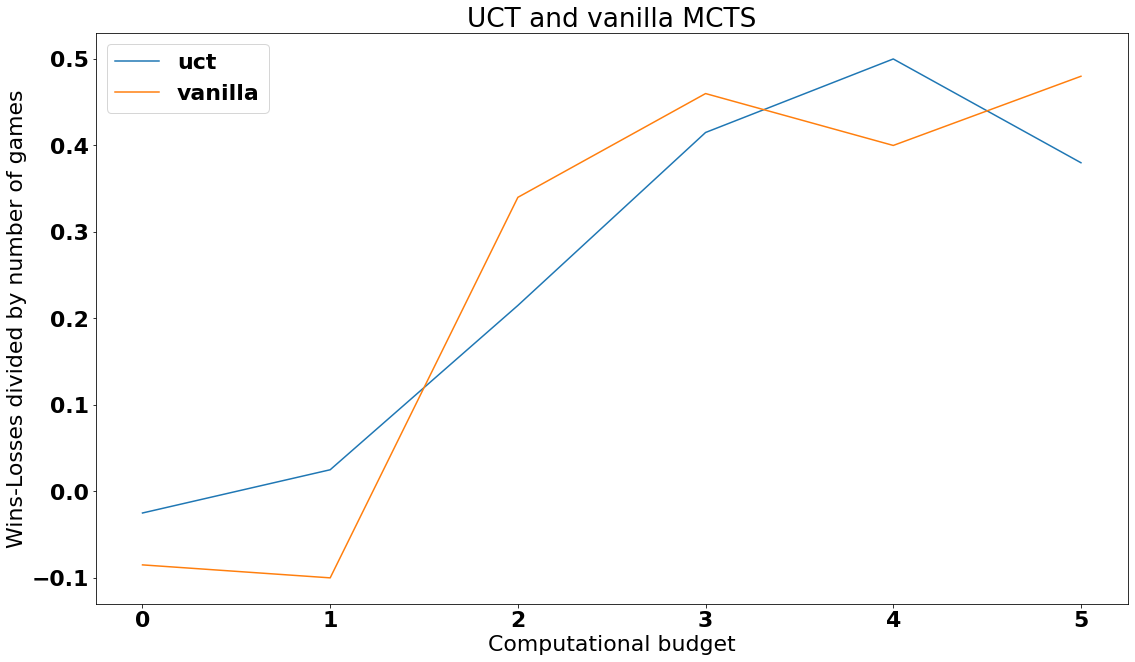

In [ ]:
plotting(final, "UCT and vanilla MCTS")